In [1]:
pip install tifffile


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install rasterio

     |████████████████████████████████| 21.1 MB 9.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
from platform import python_version

print(python_version())

3.8.8


In [2]:
pip install gdal

  Using cached GDAL-3.3.2.tar.gz (747 kB)
  Created wheel for gdal: filename=GDAL-3.3.2-cp38-cp38-macosx_10_9_x86_64.whl size=1097163 sha256=a87ed98e1f7df2dab5f2cc0a1408a52971bdddc94638bb5114c8c4b0ae467782
  Stored in directory: /Users/yusufakcakaya/Library/Caches/pip/wheels/a1/0f/e3/11c862025796b370d59cde2313fe2ddfa90ecfdbf4c90a644c
Successfully built gdal
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install rioxarray


     |████████████████████████████████| 46 kB 1.6 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 7.5 MB 334 kB/s eta 0:00:01
     |████████████████████████████████| 827 kB 14.5 MB/s eta 0:00:01
  Created wheel for rioxarray: filename=rioxarray-0.8.0-py3-none-any.whl size=54247 sha256=8b1fa75b5eeb48d2f5bc3d6f09f3de61b8f26222630f7de426317e5a613fac5d
  Stored in directory: /Users/yusufakcakaya/Library/Caches/pip/wheels/27/30/db/49a88da91de2f2ba962dbd45d22c656e14bf90d980fe0ec8c6
Successfully built rioxarray
Note: you may need to restart the kernel to use updated packages.


In [10]:
import os
import subprocess
from osgeo import gdal
import rioxarray
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [4]:
surface = rioxarray.open_rasterio('/Users/yusufakcakaya/Desktop/DHMVIIDSMRAS1m_k11/DHMVIIDSMRAS1m_k11.tif', masked=True))
surface
terrain = rioxarray.open_rasterio("/Users/yusufakcakaya/Desktop/DHMVIIDSMRAS1m_k11/DHMVIIDSMRAS1m_k11.tif", masked=True)

<xarray.DataArray (band: 1, y: 8500, x: 15500)>
[131750000 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 1.85e+04 1.85e+04 1.85e+04 ... 3.4e+04 3.4e+04
  * y            (y) float64 2.065e+05 2.065e+05 2.065e+05 ... 1.98e+05 1.98e+05
    spatial_ref  int64 0
Attributes:
    STATISTICS_MAXIMUM:  80.269996643066
    STATISTICS_MEAN:     7.0197587573284
    STATISTICS_MINIMUM:  -2.4100000858307
    STATISTICS_STDDEV:   5.6538258877648
    _FillValue:          -9999.0
    scale_factor:        1.0
    add_offset:          0.0

In [5]:
print(surface.rio.crs)
print(surface.rio.nodata)
print(surface.rio.bounds())
print(surface.rio.width)
print(surface.rio.height)

EPSG:31370
-9999.0
(18500.0, 198000.0, 34000.0, 206500.0)
15500
8500


In [6]:
surface.values


array([[[-9.999e+03, -9.999e+03, -9.999e+03, ...,  5.600e-01,
          5.700e-01,  6.000e-01],
        [-9.999e+03, -9.999e+03, -9.999e+03, ...,  6.200e-01,
          5.400e-01,  6.000e-01],
        [-9.999e+03, -9.999e+03, -9.999e+03, ...,  6.300e-01,
          6.700e-01,  6.200e-01],
        ...,
        [ 2.440e+00,  3.910e+00,  2.470e+00, ...,  4.930e+00,
          4.920e+00,  4.900e+00],
        [ 1.960e+00,  1.800e+00,  3.120e+00, ...,  4.930e+00,
          4.900e+00,  4.900e+00],
        [ 1.120e+00,  4.580e+00,  3.860e+00, ...,  4.890e+00,
          4.940e+00,  4.890e+00]]], dtype=float32)

In [ ]:
surface.plot().show(robust=True)

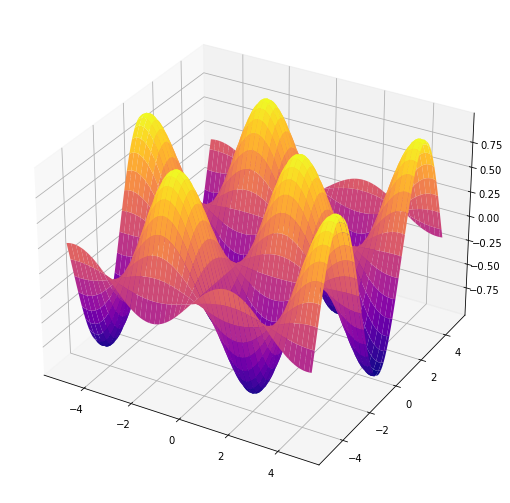

In [17]:
fig = plt.figure(figsize = [15,9])

ax = plt.axes(projection = '3d')

x_data = np.arange(-5, 5, 0.1)
y_data = np.arange(-5, 5, 0.1)

X, Y = np.meshgrid(x_data, y_data)
Z = np.sin(X) * np.cos(Y)

ax.plot_surface(X, Y, Z, cmap = 'plasma')
plt.show()